In [19]:
# Load CSV
import pandas as pd
df = pd.read_csv("/content/sample_data/high-school-directory.csv")

In [20]:
# Quick look at structure
df.head()
df.info()

df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 69 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   dbn                               435 non-null    object 
 1   school_name                       435 non-null    object 
 2   borough                           435 non-null    object 
 3   building_code                     435 non-null    object 
 4   phone_number                      435 non-null    object 
 5   fax_number                        423 non-null    object 
 6   grade_span_min                    432 non-null    float64
 7   grade_span_max                    435 non-null    int64  
 8   expgrade_span_min                 31 non-null     float64
 9   expgrade_span_max                 33 non-null     float64
 10  bus                               434 non-null    object 
 11  subway                            358 non-null    object 
 12  primary_

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Council District,Census Tract,BIN,BBL,NTA,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
count,435,435,435,435,435,423,432.000000,435.000000,31.000000,33.000000,...,432.000000,432.000000,4.310000e+02,4.310000e+02,432,434.000000,435.000000,435.000000,435.000000,435.000000
unique,435,435,5,256,427,422,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,118,NaN,NaN,NaN,NaN,NaN
top,21K344,Rachel Carson High School for Coastal Studies,Brooklyn,X450,718-381-7100,212-674-8021,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hi...,NaN,NaN,NaN,NaN,NaN
freq,1,1,121,6,4,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,8.442130,11.894253,8.516129,12.363636,...,21.856481,3988.340278,2.581724e+06,2.510921e+09,NaN,14232.228111,38.372414,3.452874,28.832184,36.949425
std,NaN,NaN,NaN,NaN,NaN,NaN,1.164591,0.421583,1.121635,0.783349,...,14.321718,15582.415491,1.189750e+06,1.136455e+09,NaN,3529.272774,19.345374,1.212249,14.209488,21.107520
min,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,9.000000,6.000000,12.000000,...,1.000000,1.000000,1.000811e+06,1.000160e+09,NaN,10090.000000,1.000000,1.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,12.000000,9.000000,12.000000,...,10.000000,118.000000,2.000992e+06,2.023060e+09,NaN,11606.000000,22.000000,2.000000,17.000000,23.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,12.000000,9.000000,12.000000,...,18.000000,251.500000,2.116159e+06,2.053680e+09,NaN,13093.000000,39.000000,4.000000,32.000000,34.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,12.000000,9.000000,12.000000,...,34.000000,510.250000,3.330710e+06,3.068830e+09,NaN,16865.750000,53.500000,5.000000,40.000000,54.000000


In [21]:
# Lowercase and replace spaces/special chars with underscores
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace(r"[^\w\s]", "", regex=True)
)

df.columns[:20]  # peek at the first few cleaned names

Index(['dbn', 'school_name', 'borough', 'building_code', 'phone_number',
       'fax_number', 'grade_span_min', 'grade_span_max', 'expgrade_span_min',
       'expgrade_span_max', 'bus', 'subway', 'primary_address_line_1', 'city',
       'state_code', 'postcode', 'website', 'total_students', 'campus_name',
       'school_type'],
      dtype='object')

In [61]:

#  total_students: should be integer
# Step 1: Clean to numeric
df["total_students"] = pd.to_numeric(
    df["total_students"].replace({"": pd.NA, "N/A": pd.NA}),
    errors="coerce"
)

# Step 2: Round and cast to Int64 (nullable integer)
df["total_students"] = df["total_students"].round(0).astype("Int64")


# campus_name: text, cleaned
df["campus_name"] = (
    df["campus_name"]
    .astype("string")        # make string
    .str.strip()             # remove extra spaces
    .replace("N/A", pd.NA)   # replace only "N/A" with missing
    .str.title()             # make names Title Case
)


# community_board -> nullable Int64
df["community_board"] = (
    pd.to_numeric(df["community_board"].replace({"": pd.NA, "N/A": pd.NA}), errors="coerce")
    .round(0)
    .astype("Int64")
)

# council_district -> nullable Int64
df["council_district"] = (
    pd.to_numeric(df["council_district"].replace({"": pd.NA, "N/A": pd.NA}), errors="coerce")
    .round(0)
    .astype("Int64")
)

# census_tract -> nullable Int64
df["census_tract"] = (
    pd.to_numeric(df["census_tract"].replace({"": pd.NA, "N/A": pd.NA}), errors="coerce")
    .round(0)
    .astype("Int64")
)

# bin -> nullable Int64
df["bin"] = (
    pd.to_numeric(df["bin"].replace({"": pd.NA, "N/A": pd.NA}), errors="coerce")
    .round(0)
    .astype("Int64")
)

# bbl -> nullable Int64
df["bbl"] = (
    pd.to_numeric(df["bbl"].replace({"": pd.NA, "N/A": pd.NA}), errors="coerce")
    .round(0)
    .astype("Int64")
)

# nta -> cleaned text (UPPER)
df["nta"] = (
    df["nta"]
    .astype("string").str.strip()
    .replace({"": pd.NA, "N/A": pd.NA})
    .str.upper()
)



In [43]:
import numpy as np
# list-type columns
list_cols = [
    "language_classes", "advancedplacement_courses", "online_ap_courses",
    "online_language_courses", "psal_sports_boys", "psal_sports_girls",
    "psal_sports_coed", "school_sports", "partner_cbo", "partner_hospital",
    "partner_highered", "partner_cultural", "partner_nonprofit",
    "partner_corporate", "partner_financial", "partner_other"
]

df[list_cols] = df[list_cols].apply(
    lambda col: col.replace({"": pd.NA, "N/A": pd.NA}))

In [44]:
# Filter only Brooklyn schools
brooklyn_df = df[df["borough"].str.contains("Brooklyn", case=False, na=False)].copy()

In [45]:
# Total schools in Brooklyn (using brooklyn_df)
total_brooklyn_schools = brooklyn_df["dbn"].nunique()

print("Total schools in Brooklyn:", total_brooklyn_schools)

Total schools in Brooklyn: 121


**Total schools in Brooklyn** : 121

In [46]:
# Schools in Brooklyn that offer Grade 9 entry
brooklyn_grade9_schools = brooklyn_df.loc[
    (brooklyn_df["grade_span_min"] <= 9) & (brooklyn_df["grade_span_max"] >= 9),
    "dbn"
].nunique()

print("Brooklyn schools offering Grade 9 entry:", brooklyn_grade9_schools)

Brooklyn schools offering Grade 9 entry: 121


**Schools in Brooklyn that offer Grade 9 entry** : 121

In [47]:
# Count of unique schools per borough
schools_per_borough = df.groupby("borough")["dbn"].nunique()

print("Unique schools per borough:")

schools_per_borough

Unique schools per borough:


,dbn
borough,
Bronx,118
Brooklyn,121
Manhattan,106
Queens,80
Staten Island,10


**Unique schools per borough:**

*   Bronx	118
*   Brooklyn	121
*   Manhattan	106
*   Queens	80
* Staten Island	10



In [62]:
# Average enrollment by borough
avg_enrollment = df.groupby("borough")["total_students"].mean().round(0)

print("Average enrollment per school by borough:")

avg_enrollment



Average enrollment per school by borough:


,total_students
borough,
Bronx,490.0
Brooklyn,699.0
Manhattan,590.0
Queens,1047.0
Staten Island,1848.0


**Average enrollment per school by borough:**
* Bronx	490.0
* Brooklyn	699.0
* Manhattan	590.0
* Queens	1047.0
* Staten Island	1848.0


In [28]:
# Summary of grade_span_max by borough
grade_summary = df.groupby("borough")["grade_span_max"].describe()
print(grade_summary)

               count       mean       std   min   25%   50%   75%   max
borough                                                                
Bronx          118.0  11.906780  0.369506   9.0  12.0  12.0  12.0  12.0
Brooklyn       121.0  11.933884  0.381566   9.0  12.0  12.0  12.0  12.0
Manhattan      106.0  11.877358  0.472135   9.0  12.0  12.0  12.0  12.0
Queens          80.0  11.825000  0.497462  10.0  12.0  12.0  12.0  12.0
Staten Island   10.0  12.000000  0.000000  12.0  12.0  12.0  12.0  12.0


### 📊 Summary of `grade_span_max` by Borough

| Borough       | Count | Mean   | Std Dev | Min | 25% | 50% | 75% | Max |
|---------------|-------|--------|---------|-----|-----|-----|-----|-----|
| **Bronx**     | 118   | 11.91  | 0.37    |  9  | 12  | 12  | 12  | 12  |
| **Brooklyn**  | 121   | 11.93  | 0.38    |  9  | 12  | 12  | 12  | 12  |
| **Manhattan** | 106   | 11.88  | 0.47    |  9  | 12  | 12  | 12  | 12  |
| **Queens**    |  80   | 11.83  | 0.50    | 10  | 12  | 12  | 12  | 12  |
| **Staten Island** | 10 | 12.00 | 0.00    | 12  | 12  | 12  | 12  | 12  |

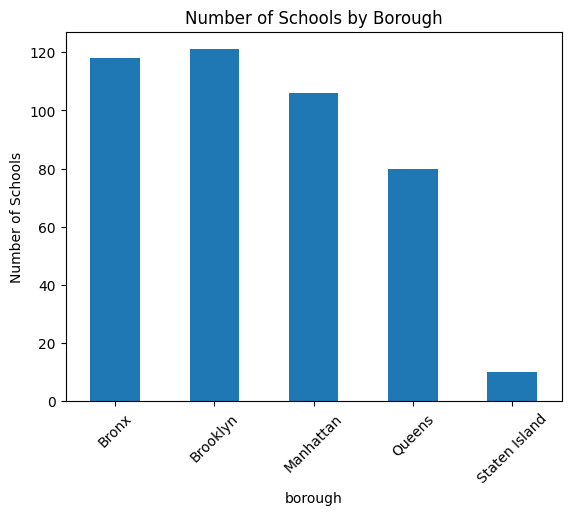

In [41]:
# Unique schools per borough(bar chart)
import matplotlib.pyplot as plt
schools_per_borough.plot(kind="bar", title="Unique schools per borough", rot=45)
plt.ylabel("Number of Schools")
plt.show()

***📌 Key Insights***

1. **Brooklyn** has the most high schools (121), followed closely by
the Bronx (118).
Manhattan (106) also has many, while Queens (80) and Staten Island (10) have fewer. This suggests school choice is much broader in Brooklyn, Bronx, and Manhattan compared to Queens and Staten Island.

2. **Average school size varies dramatically by borough.**
Staten Island schools are by far the largest (average 1,850 students), followed by Queens (1,050). In contrast, the Bronx, Brooklyn, and Manhattan have much smaller schools on average (roughly 490-700 students).

3. **Grade spans are consistent across boroughs.**
Most schools cap at Grade 12, with grade_span_max almost always being 12. Staten Island schools are particularly uniform, all ending at Grade 12.